# Chapter 06 - Probabilities

Code from "Chapter 6" of the book, _Data Science from Scratch_, 2nd edition, by Joel Grus.

In [1]:
from collections import Counter
import enum
import fractions
import math
import random

In [2]:
import matplotlib.pyplot as plt

In [3]:
import dsfs as scratch

## Dependence and Independence

Roughly speaking, we say that two events, _E_ and _F_, are **dependent** if knowing something about whether _E_ happens gives us information about whether _F_ happens (and vice versa). Otherwise, we say that _E_ and _F_ are **independent**.

Mathematically, we say that two events, _E_ and _F_, are independent if the probability that both happens is the product of the probabilities that each event happens. In symbols:

$$
    P (E|F) = P(E)P( F)
$$

## Conditional Probability

We use conditional probabilities to calculate, "What is the probability that 'both children are girls' given that 'at least one of the children is a girl'?"

Mathematically, if we have:

- B - The event, 'both children are girls'
- L - The event, 'at least one of the children are girls'

Symbolically, we calculate the conditional probabilities as:

$$
    P(B|L) = \frac{P(B, L)}{P(L)} = \frac{P(B)}{P(L)} = \frac{\frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}
$$


We can "check" this calculation by "generating" a lot of families; that is, by performing a simulation.

In [4]:
# An `Enum` is a typed set of enumerated values. We can use them to make our
# code more descriptive and readable.
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)  # A specific seed makes random values repeatable.

for _ in range(1000):  # Don't care about the iterated values
    younger = random_kid()
    older = random_kid()

    if older == Kid.GIRL:
        older_girl += 1

    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1

    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

In [5]:
print(f'P( both | older ) = {both_girls / older_girl} ~= {fractions.Fraction(1, 2)}')
print(f'P( both | either ) = {both_girls / either_girl} ~= {fractions.Fraction(1, 3)}')

P( both | older ) = 0.4949290060851927 ~= 1/2
P( both | either ) = 0.32232496697490093 ~= 1/3


## Bayes's Theorem

One of the data scientist's best friends is Bayes's Theorem, which is a way of "reversing" conditional probabilities.

Imagine that we are interested in the conditional probability of _E_ occurring given that _F_ has occurred; however, the only information we have is the "reverse" conditional probability: the probability that _F_ occurs given that _E_ has occurred. How can we solve this problem?

We can solve this problem by applying the definition of conditional probability **twice**.

$$
    P(E | F) = \frac{P(E, F)}{P(F)}
$$

But,

$$
    P(E, F) = P(F, E) = P(F | E) P(E)
$$

Substituting for $ P(E, F) $ in the first equation, we get:

$$
    P(E | F) = \frac{P(F | E)P(E)}{P(F)}
$$

We can split the event _F_ into (F and E) + (F and not E). In symbols

$$
    P(F) = P(F, E) + P(F, \neg{E})
$$

Substituting this expression for P(F) and expressing the joint probabilities in terms of conditional probabilities gives us:

$$
    P(E | F) = \frac{P(F | E)(P(E)}{P(F, E) + P(F, \neg{E})|
$$

And

$$
    P(E | F) = \frac{P(F | E)(P(E)}{P(F | E)P(E) + P(F | \neg{E})P(\neg{E})}
$$

Which is one of the formulations of Bayes's Theorem.

As an application of Bayes's Theorem (with tongue firmly in cheek demonstrating why data scientists are smarter than doctors), imagine that a certain diseases affects only 1 in 10,000 people in the general population. Further, imagine that a doctor orders a test that gives the correct result, "diseased" if you have this diseases and "not diseased" if you do not have the disease, 99% of the time. Finally, imagine that the result of your test is "diseased."

What is the actual probability that you have this diseases?

We can use Bayes's Theorem to calculate this probability. If _D_ is the event "actually diseased" and _T_ is the event "test reports 'diseased'", then we have the following symbolic equation:

$$
    P(D | T) = \frac{(P(T | D)(P(D)}{P(T | D)P(D) + P(T | \neg{D})P(\neg{D})}
$$

But,

- $P(T | D) = 0.99$
- $P(D) == 0.0001$
- $P(T | \neg{D}) == 0.01$
- $P(\neg{D}) == 0.9999$

Substituting these numbers produces:

$$
    P(D | T) = \frac{0.99 \cdot 0.0001}{(0.99 \cdot 0.0001) + (0.01 \cdot 0.9999)} = 0.98\%
$$

**NOTE**: This analysis is unrealistic. A hidden assumption is that people take the test at random. In reality, since the test is administered mostly to people who have symptoms, the correct conditioning event is something like "test positive and have symptoms". In this scenario, the odds of having the disease are likely much higher than the result of our analysis.


## Random Variables

A _random variable_ is a variable whose possible values have an associated **probability distribution**.

For example, a very simple random variable has the value 1 if a coin flip is heads and 0 if the coin flip is tails (a Bernoulli trial with probability of heads $\frac{1}{2}$). A more complicated example is the number of heads that one observes when flipping a coin 10 times (or 10 "identical" coins) (a binomial distribution of 10 Bernoulli trials each with probability of heads $\frac{1}{2}$). Another complicated example is the probability of picking an integer from the range [0, 9] where all numbers are equally likely (a "uniform" distribution).

The _expected value_ of a random variable is the average of all the possible values in the distribution weighted by the probability of seeing that value. For a Bernoulli trial with probability $\frac{1}{2}$ is

$$
    \frac{1}{2} \cdot 1 + \frac{1}{2} \cdot 0 == \frac{1}{2}
$$

Random variables can be _conditioned_ on events just as other events can.

For the most part, we will use random variables implicitly in what we do.

## Continuous Distributions

### The Uniform Distribution

A coin flip, multiple coin flips and selecting integers in [0, 9] with each integer selected with probability $\frac{1}{10}$ are all examples of _discrete_ distributions: a distribution that associates probabilities with **discrete** outcomes.

Imagine a distribution that puts equal probabilities on each value in [0, 1]. Because an **infinite** number of values exist in [0, 1], the probability of each value tends toward 0 in such a way that the sum of all these values is identically 1; that is,

$$
    \int{0}^1 uniform(x)dx = 1
$$

if "uniform(x)" is the uniform distribution between 0 and 1.


The function, "uniform(x)", is a _probability density function_.

Notice that the Python's `random.random()` is a (pseudo)random variable modelling a uniform probability density function.

In [6]:
{x: scratch.probability.uniform_pdf(x) for x in [-0.0001, 0, 0.5, 0.9999, 1]}

{-0.0001: 0, 0: 0, 0.5: 0.5, 0.9999: 0.9999, 1: 0}

We are often more interested in the _cumulative density function_, (CDF), which gives the probability that a random variable is less than or equal to a specified value.

In [7]:
{x: scratch.probability.uniform_cdf(x) for x in [-0.0001, 0, 0.5, 0.9999, 1]}

{-0.0001: 0, 0: 0, 0.5: 0.5, 0.9999: 0.9999, 1: 1}

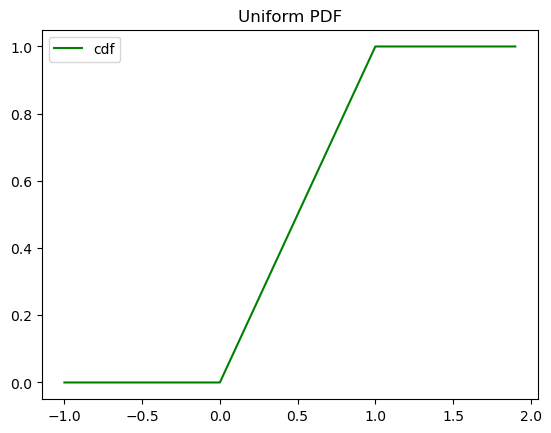

In [8]:
xs = [x / 10.0 for x in range(-10, 20)]
plt.plot(xs, [scratch.probability.uniform_cdf(x) for x in xs], 'g-', label='cdf')
plt.legend()  # is best location
plt.title('Uniform PDF')
plt.show()

### Normal Distribution

The normal distribution is the classic, bell-shaped distribution and is completely determined by two parameters: its mean, $\mu$, and its standard deviation, $\sigma$. The mean indicates where the bell is centered; the standard deviation describes how "wide" is the distribution.

The normal PDF is given by:

$$
    f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi}\sigma} exp(-\frac{(x - \mu)^2}{\sigma^2})
$$

In [9]:
# For different means and sigmas
for mu in [0, 0, 0, -1]:
    for sigma in range(-3, 3 + 1):
        print(f'N({mu}, {sigma}) = {scratch.probability.normal_pdf(mu, sigma)}')
    print()

N(0, -3) = 0.0044318484119380075
N(0, -2) = 0.05399096651318806
N(0, -1) = 0.24197072451914337
N(0, 0) = 0.3989422804014327
N(0, 1) = 0.24197072451914337
N(0, 2) = 0.05399096651318806
N(0, 3) = 0.0044318484119380075

N(0, -3) = 0.0044318484119380075
N(0, -2) = 0.05399096651318806
N(0, -1) = 0.24197072451914337
N(0, 0) = 0.3989422804014327
N(0, 1) = 0.24197072451914337
N(0, 2) = 0.05399096651318806
N(0, 3) = 0.0044318484119380075

N(0, -3) = 0.0044318484119380075
N(0, -2) = 0.05399096651318806
N(0, -1) = 0.24197072451914337
N(0, 0) = 0.3989422804014327
N(0, 1) = 0.24197072451914337
N(0, 2) = 0.05399096651318806
N(0, 3) = 0.0044318484119380075

N(-1, -3) = 0.05399096651318806
N(-1, -2) = 0.24197072451914337
N(-1, -1) = 0.3989422804014327
N(-1, 0) = 0.24197072451914337
N(-1, 1) = 0.05399096651318806
N(-1, 2) = 0.0044318484119380075
N(-1, 3) = 0.00013383022576488537



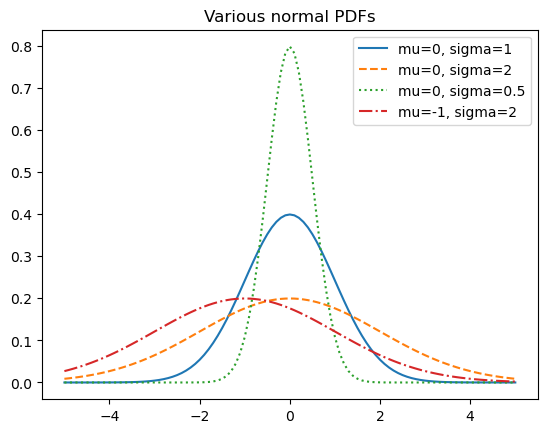

In [10]:
# Plot normal distributions for different parameters (mu and sigma)
xs = [x / 10.0 for x in range(-50, 50 + 1)]
plt.plot(xs, [scratch.probability.normal_pdf(x) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [scratch.probability.normal_pdf(x, 0, 2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [scratch.probability.normal_pdf(x, 0, 0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [scratch.probability.normal_pdf(x, -1, 2) for x in xs], '-.', label='mu=-1, sigma=2')
plt.legend()  # in best location
plt.title('Various normal PDFs')
plt.show()

#### Some Additional Information about the Normal PDF

When $\mu=0$ and $\sigma=1$, the distribution is called the _standard normal distribution_.

If $Z$ is a standard normal variable, then it turns out that the random variable, $X$, defined by:

$$
    X = \sigma Z + \mu
$$

is also normally distributed but with mean, $\mu$, and standard deviation, $\sigma$.

Conversely, if $X$ is a normal random variable with mean, $\mu$, and with standard deviation, $\sigma$, the random variable, $\Z$, defined by:

$$
    Z = frac{X - \mu}{\sigma}
$$

is again a standard normal variable.

The CDF (cumulative distribution function; that is a function that determines the probability that a value, `x` is less than or equal to a random variable distributed normally (using a specified mean and standard deviation)) cannot be calculated in an "elementary" manner.

But it can be written in terms of the error function, `math.erf`:

$$
    CDF(x) = \frac{1}{2}(1 + erf(\frac{x - \mu}{\sigma \sqrt{2}}))
$$

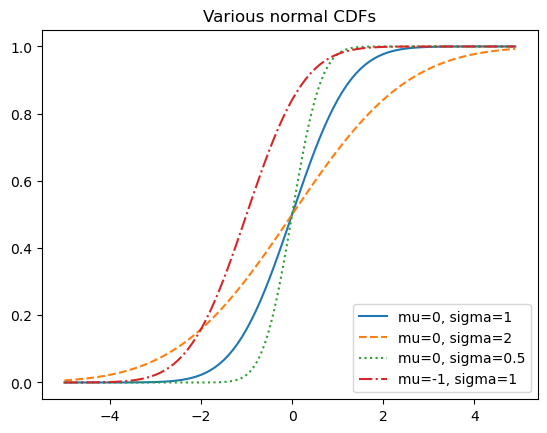

In [11]:
# We plot a few normal CDFs
xs = [x / 10 for x in range(-50, 50)]
plt.plot(xs, [scratch.probability.normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [scratch.probability.normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [scratch.probability.normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [scratch.probability.normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc='lower right')
plt.title('Various normal CDFs')
plt.show()

The CDF maps from a value, `x`, to a probability. Sometimes, however, you know the probability and want to calculate the `x` corresponding to that probability. This calculation can be performed by inverting the `normal_cdf` function.

There's no closed from for this (mathematical) function. Some approximations exist using either infinite series or continued fractions, but we will implement our (computer) function using a binary search.

## The Central Limit Theorem

One reason that the normal distribution is studied so extensively is the Central Limit Theorem.

The Central Limit Theorem can be summarized as "a random variable that is the average of a large number of independent and identically distributed random variables is, itself, normally distributed" (independent of the distribution of the underlying random variables).

In particular, the Central Limit Theorem states that, if $x_{i}$ are random variables with mean, $\mu$, and standard deviation, $\sigma$, and if $n$ is "large", then the sum:

$$
    \lim_{n \to +\infty} \frac{1}{n}\sum_{i=1}^{i=n}x_{i} \rightarrow \mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})
$$

Equivalently (but often more usefully),

$$
    \lim_{n \to +\infty} \frac{\sum_{i=1}^{i=n}x_{i} - \mu n}{\sigma \sqrt{n}} \rightarrow \mathcal{N}(0, 1)
$$

An easy way to illustrate this theorem is to look at a _binomial_ random variable. The _binomial_ distribution is characterized by two parameters, $n$ and $p$.

Specifically: A $\mathcal{Bin}(n, p)$ random variable consists of $n$ _Bernoulli trials_ where each trial generates 1 with probability, $p$, and 0 with probability, $1 - p$. The mean of a Bernoulli variable is $p$; its standard deviation is $\sqrt{p(1-p)}$.

The Central Limit Theorem says that, as $n$ gets large, a random variable from $\mathcal{Bin}(n, p)$ is approximately a random variable from $\mathcal{N}(np, \sqrt{np(1 - p})$

In [12]:
# Let's check this result by plotting both the binomial (using a histogram) and a continuous normal distribution.
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Plots a histogram from a Bin(n, p) mass function."""
    data = [scratch.probability.binomial(n, p) for _ in range(num_points)]

    # Use a bar chart to show the values sampled from the binomial distribution.
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],  # shift each bar by half-a-bar width
            [v / num_points for v in histogram.values()],  # fraction of values
            0.8,  # width of each bar
            color='0.75')

    # Plot samples from the expected normal distribution using a line chart
    mu = n * p
    sigma = math.sqrt(n * p * (1 - p))

    xs = range(min(data), max(data) + 1)
    ys = [scratch.probability.normal_cdf(i + 0.5, mu, sigma) - scratch.probability.normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial distribution vs. Normal approximation')
    plt.show()

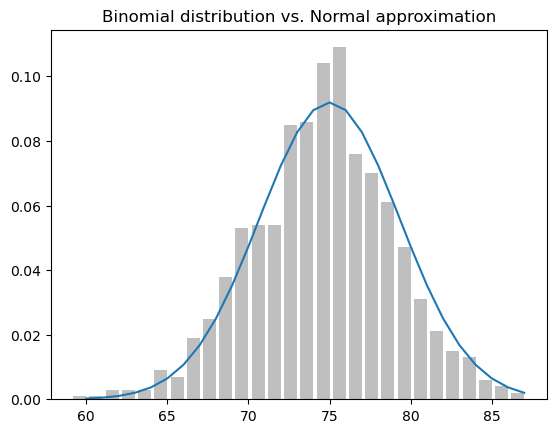

In [13]:
binomial_histogram(0.75, 100, 1000)

The moral of the story: if you want to know the probability of 60 heads in 100 flips, it is easier to estimate the probability that a $\mathcal{N}(50, 0.5) > 60$ instead of computing the CDF of  $\mathcal{Bin}(100, 0.5)$.

(Although it today's world, most statistical software will gladly perform any calculation that your heart desires. :) )

Consider investigating `scipy.stats` for PDF and CDF of popular distributions.